# Сборный проект №1 Яндекс Практикум 

# Описание проекта 

<div style="border:solid green 2px; padding: 20px">

   Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
    Перед вами данные до 2016 года.  
    Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.    
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 
    
**Цель исследования** - Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   

**Исходные данные** - данные о продажах компьютерных игр до 2016 года.  

**Ход исследования:**  
 Сколько игр выпускалось в разные годы?  
 Как менялись продажи по платформам?  
 Какие платформы лидируют по продажам, растут или падают?   
 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?    
  
Определить для пользователя каждого региона (NA, EU, JP):  
 - Самые популярные платформы (топ-5).
 - Самые популярные жанры (топ-5).
Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
  
Проверить гипотезы:  
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
</div>

# Откроем файл с данными и изучим общую информацию

1. Импортируем библиотеки для работы с данными

In [1]:
#импортировали библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

2. Открытие файла с данными и изучение общей информации

In [2]:
#считываем датасет
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [3]:
#изучим полученные данные 
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


 # Подготовка данных  

<div style="border:solid blue 1px; padding: 20px"> 
    
 # Цели
 - Проверить данные на количество пропусков и сделать по ним выводы;
 - Заменить названия столбцов (привести к нижнему регистру);  
 - Преобразовать данные в нужные типы;  
 - Обработать пропуски;    
 - Описать причины, которые могли привести к пропускам;  
 - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать его обработку;  
 - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.  
    
</div>

In [4]:
# проверим названия столбцов и сделаем выводы для дальнейшей предобработки данных
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# проверим информацию о пропущенных значениях и типах данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


3. Просчитаем количество пустых значений

In [6]:
# посчитаем количество пустых значений
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено

4. Проверим количество пропусков в процентах

In [8]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


***Вывод:***
<div style="border:solid green 1px; padding: 20px">
    
**Наименование столбцов в датасете**   
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).   
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
    
В данной таблице 16715 строк и 11 столбцов.  
Для начала нужно привести названия столбцов к нижнему регистру для корректной и удобной работы с данными.  
В данных есть пропущенные значения в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.    
В столбце Year_of_Release тип данных не соответсвует. Из вещественного числа тип float64 нужно данные привести к целочисленному формату int64.   
В столбце User_Score(оценка пользователей) нужно изменить тип данных с object на вещественный тип float64.    

Пропуски в столбцах Name, Genre есть два пропущенных значения, возможно, забыли заполнить. Так как процент пропусков в этих столбцах слишком мал, мы их можем удалить.  
В столбце Year_of_Release пропуски составляют 2%, их можно удалить, но также можно заполним нулевым значением, чтобы сохранить максимум информации для анализа.

Много пропусков в столбцах rating, critic_score, user_score - это порядка 40-51%. Возможно, пропуски связаны с тем, что игры новые и их не успели оценить критики и пользователи. Эти данные нельзя просто так отбросить, потому что они ещё могут пригодиться для дальнейшего анализа.
    
</div>

5. Приведем столбцы к нижнему регистру

In [10]:
data.columns = data.columns.str.lower()

In [11]:
# проверим результат
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:**
<div style="border:solid green 1px; padding: 20px">
Столбцы приведены к нижнему регистру и проименованы верно (применен змеиный регистр) и не нуждаются в переименовании. 
</div>

# **Обработка пропусков и пропущенных значений**

1. Удалим пропущенные значения в столбце year_of_release и поменяем тип данных на целочисленный int64

In [12]:
# удалим пропуски в столбце year_of_release
data.dropna(subset=['year_of_release'], inplace=True)

In [13]:
# меняем тип данных на целочисленный
data['year_of_release'] = data['year_of_release'].astype('int')

Пропущенных значений в столбце year_of_release не более 2%.  
Поэтому их удалили, они не повлияют на общий анализ.

In [14]:
# проверяем наличие пропусков
data['year_of_release'].isna().sum()

0

In [15]:
# проверим результат
data['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

In [16]:
# удалим значение года выпуска игры 1985 на платформе DS
data = data.drop(data[(data.year_of_release == 1985) & (data.platform == 'DS')].index)

2. Проверим уникальные значения в столбце user_score. 

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Найдено значение 'tbd', что означает рейтинг не определен. Изменим его на NaN. 

3. Изменим значение 'tbd' на nan.

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [19]:
# выведим уникальные значения и проверим результат
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

4. Изменим тип данных в столбце user_score на вещественный тип float64.

In [20]:
# изменим тип данных на вещественный
data['user_score'] = data['user_score'].astype('float')

In [21]:
# проверим результат
data['user_score'].head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

5. Проверим количество пропущенных значений в столбцах name и genrе и удалим их.

In [22]:
# проверяем количество пропусков
data['name'].isna().sum()

2

In [23]:
data['genre'].isna().sum()

2

In [24]:
# удаляем их
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

In [25]:
# проверим результат
data['name'].isna().sum()

0

In [26]:
data['genre'].isna().sum()

0

Избавились от пропусков в столбцах название игры и жанр.

In [27]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8460
user_score         8980
rating             6675
dtype: int64

6. Проверим столбцы жанр и рейтинг от организации ESRB на дубликаты в названиях.

In [28]:
# проверим нет ли дубликатов в назаниях жанров
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [29]:
# проверим нет ли дубликатов в категориях рейтинга
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявные дубликаты отсутствуют.

7. Много пропущенных значений в столбцах: critic_score, user_score, rating. Проверим и сделаем выводы.

In [30]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [32]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод:**
<div style="border:solid green 1px; padding: 20px"> 
    
Заполнять пропуски медианным либо средним значениями, думаю, будет неправильно.   
Игры хоть и старые, но были в своё время довольно популярными, а для тех игр, которые мало продавались, не справедливо приравнивать рейтинг к среднему.   
Оставим без изменений так как это не должно повлиять на анализ.    
Намного сильнее повлияет на результат, заполненные значения медианой, так как этих пропущенных значений очень много. И может в корне исказить наши выводы.  
    
</div>    

8. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [33]:
# посчитаем суммы продаж всех регионов
data['total_sale'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sale'].head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: total_sale, dtype: float64

In [34]:
# проверим результат
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Провели предобработку данных: выявили пропуски, заменили пропуски нулевым значением в столбце year_of_release.  
Изменили типы данных в столбцах  year_of_release и user_score.  
Удалили пропущенные значения в столбцах name и genre.   
Нашли значение 'tbd' в столбце user_score и изменили его на NaN.  
Проверили столбцы genre и raiting на наличие дубликатов. Дубликаты отсутствуют.  
Пропущенные значения в столбцах critic_score, user_score, rating оставили как есть.
    
Посчитали сумму продаж игр всех регионов и записали данные в новый столбец total_sale.  
      
</div>

In [36]:
data['rating'] = data['rating'].fillna('Empty')

In [37]:
data['rating'].isna().sum()

0

В интернете можно получить определения для представленных рейтингов.   
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»  
K-A - старый вариант маркировки E (for everyone)  

Заполнили пропуски заглушкой.

# **Проведение исследовательского анализа данных**

<div style="border:solid blue 1px; padding: 20px"> 
    
 # Цели
 - Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Как менялись продажи по платформам? 
   Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.  
   За какой характерный срок появляются новые и исчезают старые платформы?  
      
 - Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
 - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
 - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
   Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
 - Соотнесем выводы с продажами игр на других платформах.
 - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
   Выделяются ли жанры с высокими и низкими продажами?
    
</div>

1. Посмотрим по годам, когда был самый ранний год выпуска игры и последний.
   Создадим гистограмму "Количество игр, выпущенных за разные годы".

In [38]:
# применим к столбцу метод min()
data[data['year_of_release'] > 1900]['year_of_release'].min()

1980

In [39]:
# применим к столбцу метод max()
data['year_of_release'].max()

2016

Мы имеем данные об играх с 1980 по 2016 годы.

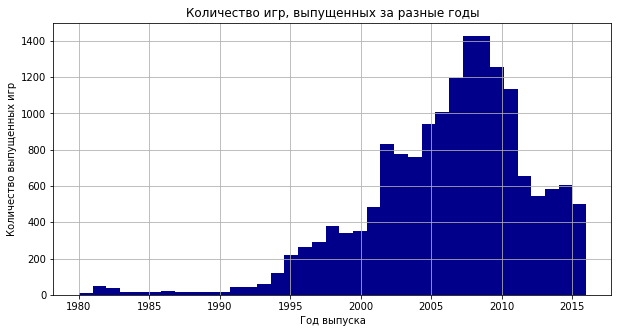

In [40]:
# создадим гистограмму
data['year_of_release'].hist(bins=37, color='darkblue', figsize=(10,5))
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество игр, выпущенных за разные годы')
plt.show()

In [42]:
# проверим значения
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1984      14
1985      13
1980       9
Name: year_of_release, dtype: int64

 
Пожалуй самый активный период с 2005 по 2009 год. В этот промежуток времени выпускалось наибольшее количество игр.

2. Рассмотрим как менялись продажи по платформам? 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.  
Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов.  
Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают?  
Выберем несколько потенциально прибыльных платформ.  

In [43]:
# сгруппируем данные двух столбцов platform и total_sale и выведем результат на экран, где значения отсортированы по убыванию
platforms_ascending = data.pivot_table(
    index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale', ascending=False)
platforms_ascending

,total_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


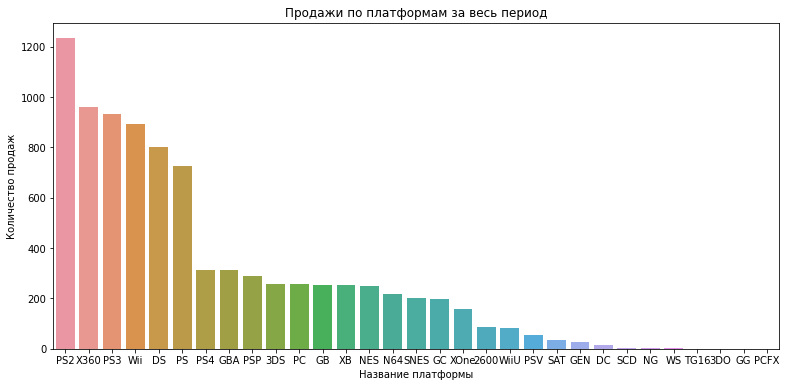

In [44]:
plt.figure(figsize = (13,6))
sns.barplot(x=platforms_ascending.index, y=platforms_ascending['total_sale'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Из гистограммы видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

2.1. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [45]:
# создадим данные по топ-6 самых популярных платформ, отсортируем по убыванию
platform_grouped = data.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(
    by='total_sale', ascending=False)
platform_grouped = platform_grouped.head(6).reset_index()
platform_grouped

,platform,total_sale
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58


In [46]:
# выведем уникальные значения
top_platforms = platform_grouped['platform'].unique()

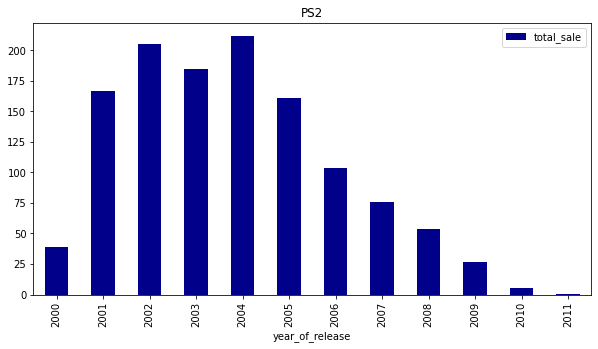

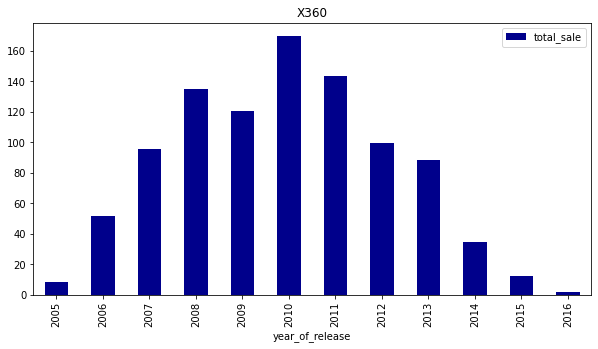

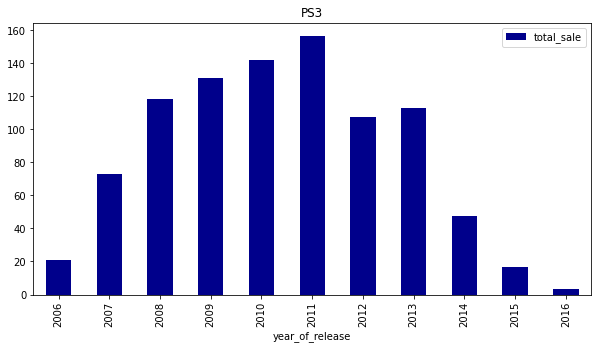

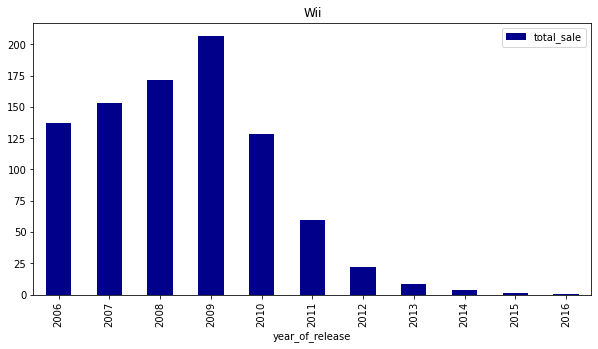

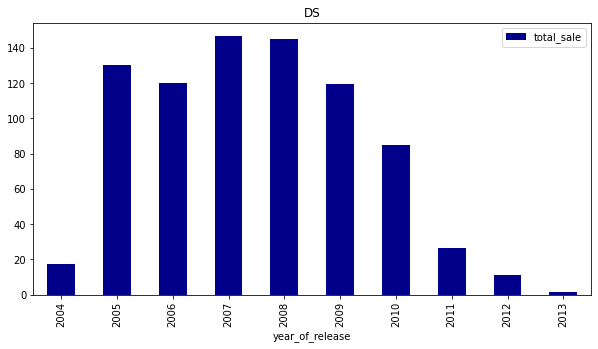

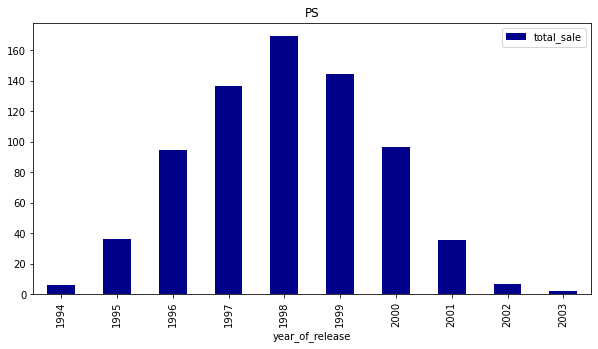

In [47]:
# создадим распределение топ-6 платформ по годам
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(
        index='year_of_release', 
        values='total_sale', 
        aggfunc='sum').plot(
        kind='bar', 
        figsize=(10, 5),
        color='darkblue'
)
    plt.title(platform)

**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Можно сделать вывод, что существование платформы в среднем 10 лет.      
Большинство платформ появляется c начала 2000-x - это в частности PS2, но стоит отметить, что первая PS была в лидерах с 1994 по 2000 год, далее вышла PS2 и соотвественно она пошла развивать продажи. С 2004 года по 2010 - DS, остальные начали развитие с 2006 года.  
Cамые продаваемые это Sony Play Station и Xbox.   
Активные продажи были в период с 2001 по 2012 год.     
Затем пошли на спад, что, скорее всего, связано с возросшей популярностью мобильных игр.    

Чем больше выборка, тем точнее результат, но прогноз нам нужно сделать на 2017 год.     
На мой взгляд актуальный период для прогноза с 2012 по 2016 гг. 
    
</div>

Отсортируем таблицу и оставим продажи только начиная с 2012 года.

In [48]:
good_data = data[data['year_of_release'] >= 2012].pivot_table(
    index='platform', 
    values='total_sale', 
    aggfunc='sum').sort_values(
    by='total_sale',
    ascending=False).reset_index()
good_data

,platform,total_sale
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


2.2. Пострим графики по количеству выпущенных игр за актуальный период на разных платформах

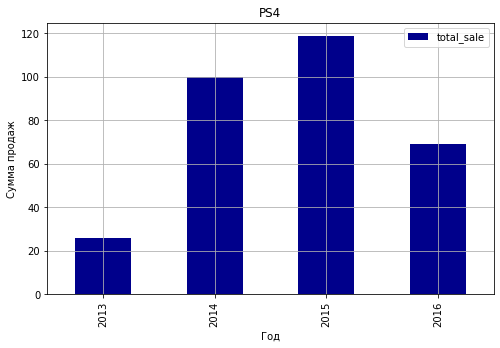

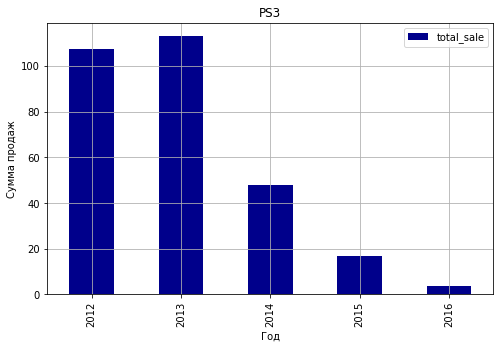

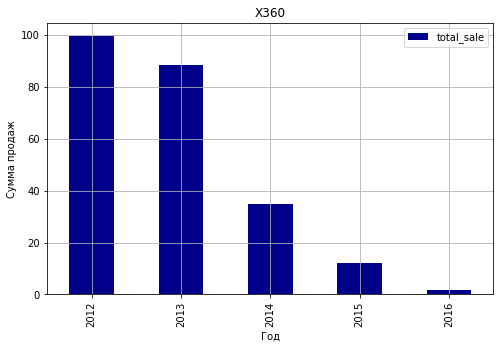

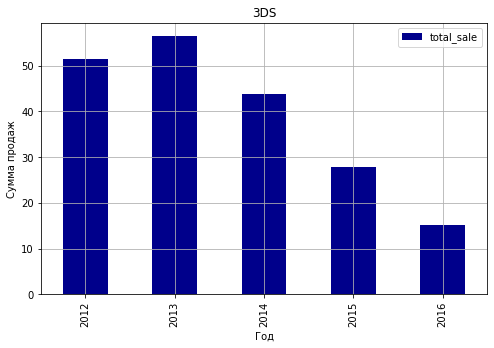

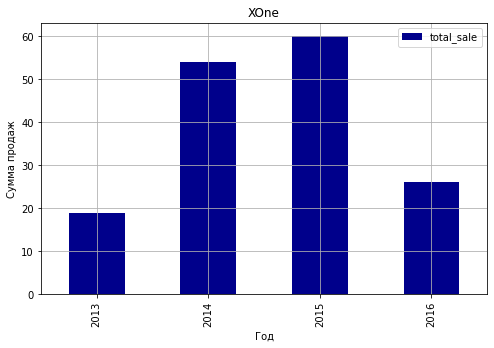

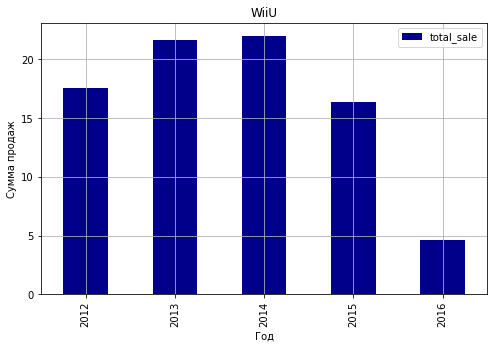

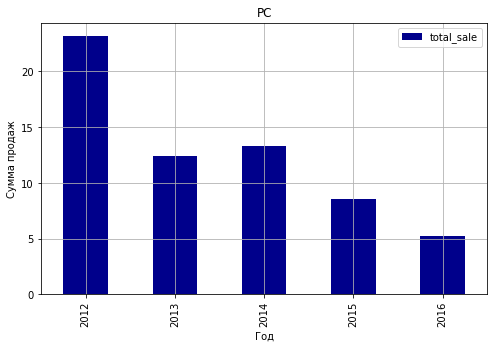

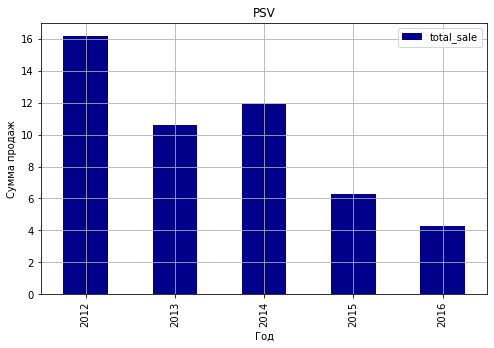

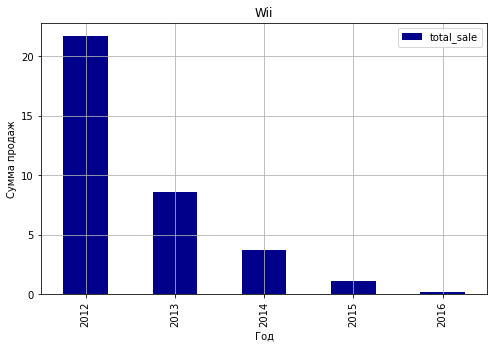

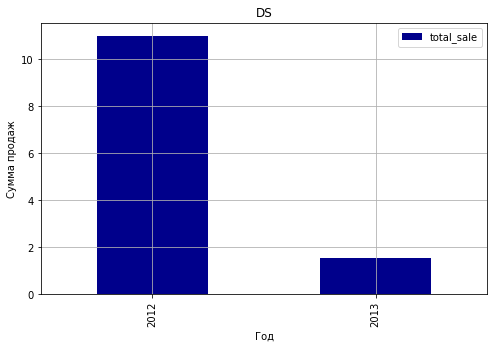

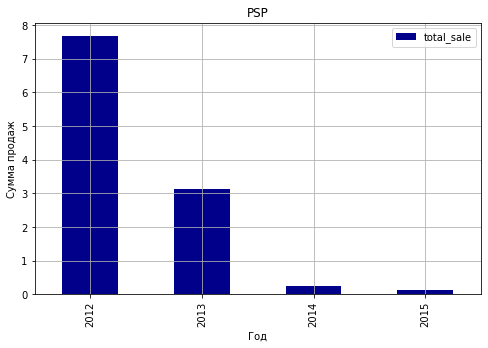

In [49]:
for name in good_data['platform']:
    data[(data['platform'] == name) & (data['year_of_release'] >= 2012)
      ].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum'
                   ).plot(kind='bar', grid=True, color='darkblue', figsize=(8,5),title=name)
    plt.xlabel('Год')
    plt.ylabel('Сумма продаж')

**Вывод:**
<div style="border:solid green 1px; padding: 20px">

Платформа PS4 — лидирует по продажам, платформа X360 — на втором месте.  
    
Платформы 3DS, XOne, PS3, WiiU, PC, PSV — остаются потенциально прибыльными.  
    
</div>

2.3. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Отсортируем таблицу data, оставим только прибыльные платформы и продажи за актуальный период.

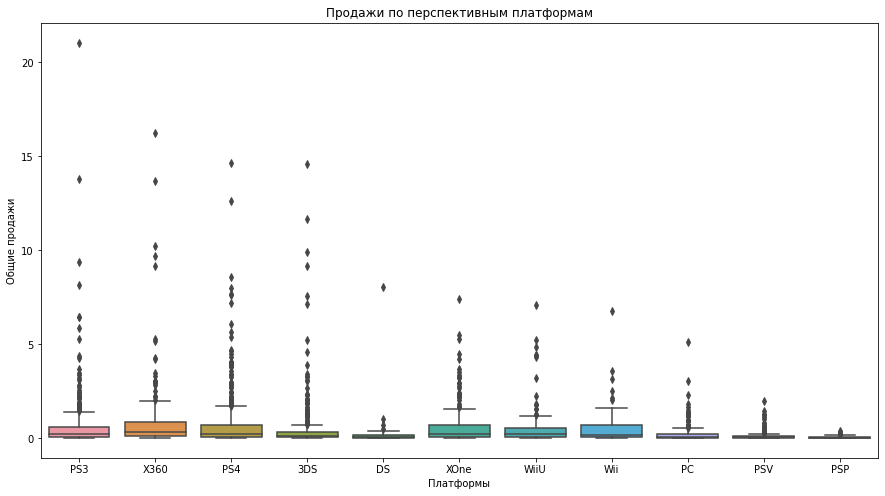

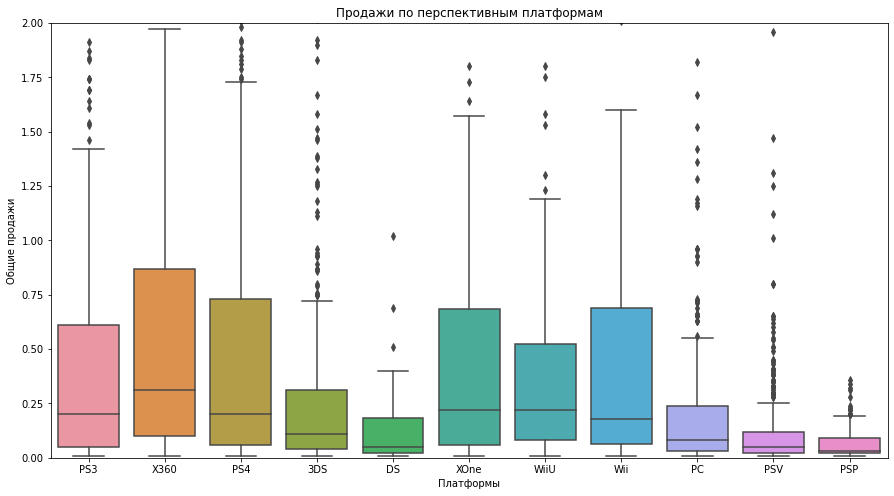

In [50]:
data, y = data[data['year_of_release'] >= 2012], 'total_sale'
plt.figure(figsize=(15, 8))
(sns.boxplot(data = data, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(15, 8))
(sns.boxplot(data = data, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()


In [51]:
data.pivot_table(index='platform', values='total_sale', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
platform,,,,,,,,
3DS,0.0400,0.11,0.3125,396.0,14.60,0.491439,0.01,1.387161
DS,0.0200,0.05,0.1850,31.0,8.06,0.404839,0.01,1.439245
PC,0.0300,0.08,0.2400,250.0,5.14,0.250600,0.01,0.494640
PS3,0.0500,0.20,0.6100,493.0,21.05,0.585781,0.01,1.462855
PS4,0.0600,0.20,0.7300,392.0,14.63,0.801378,0.01,1.609456
PSP,0.0200,0.03,0.0900,173.0,0.36,0.064682,0.01,0.071296
PSV,0.0200,0.05,0.1200,411.0,1.96,0.119659,0.01,0.203011
Wii,0.0625,0.18,0.6875,54.0,6.76,0.655000,0.01,1.165447
WiiU,0.0800,0.22,0.5250,147.0,7.09,0.559116,0.01,1.058836


**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Наибольший потенциал имеют платформы PS4, PS3, X360, 3DS, XOne, WiiU.
    
</div>

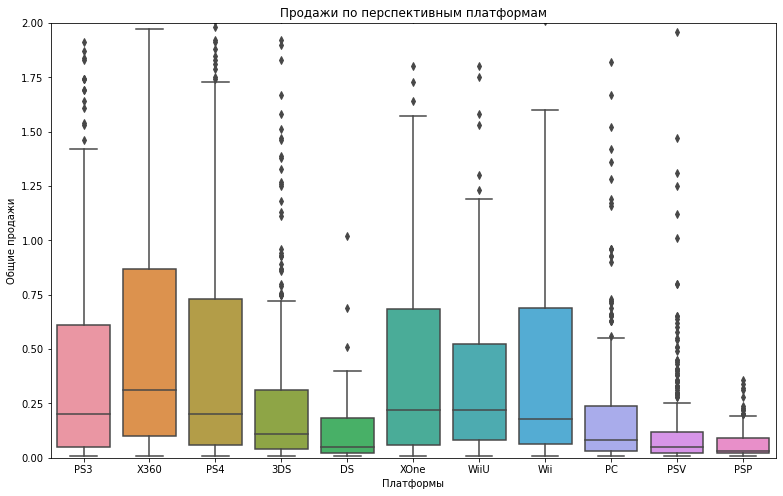

In [52]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = temp[temp['year_of_release'] >= 2012], 'total_sale'
#plt.figure(figsize=(13, 8))
#(sns.boxplot(data = data_temp, y = y, x='platform')
    #.set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
#plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

2.4. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возмём для исследования платформу PS4, она имеет достаточно данных, что влияет на точность и качество исследования.

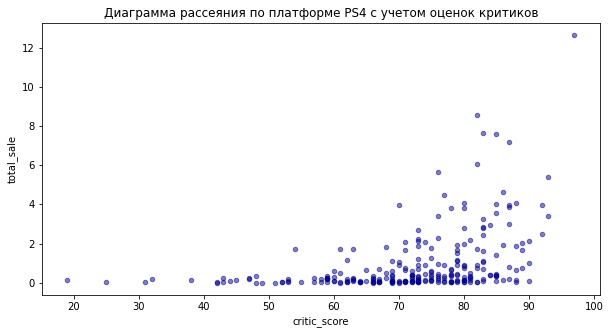

In [53]:
# построим диаграмму рассеяния для оценки критиков
data.query('platform == "PS4"').plot(
    x='critic_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkblue',
    title='Диаграмма рассеяния по платформе PS4 с учетом оценок критиков'
)
plt.show()

In [54]:
# посчитаем корреляцию
data.query('platform == "PS4"')['total_sale'].corr(data['critic_score'])

0.406567902061781

По корреляции Пирсона зависимость продаж игр на платформе PS4 от оценки критиков умеренная.

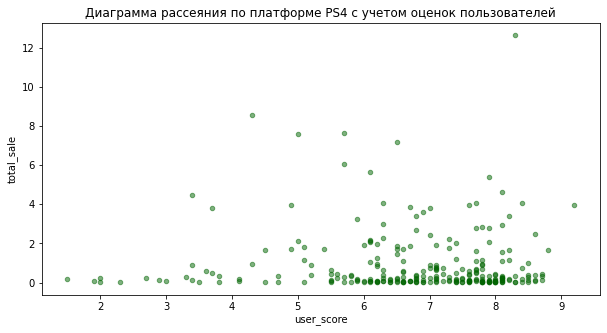

In [55]:
# построим диаграмму рассеяния для оценки пользователей
data.query('platform == "PS4"').plot(
    x='user_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkgreen',
    title='Диаграмма рассеяния по платформе PS4 с учетом оценок пользователей'
)
plt.show()

In [56]:
# посчитаем корреляцию
data.query('platform == "PS4"')['total_sale'].corr(data['user_score'])

-0.031957110204556376

По корреляции Пирсона зависимость продаж игр на платформе PS4 от оценки пользователей очень слабая.   
Можно сказать, что в принипе её нет.  

2.4.1. Посчитаем зависимость продаж от оценок на других игровых платформах.

Построим диаграммы рассеяния по каждой актуальной платформе и посмотрим, есть ли зависимость между продажами и оценками критиков/пользователей.

**X360**

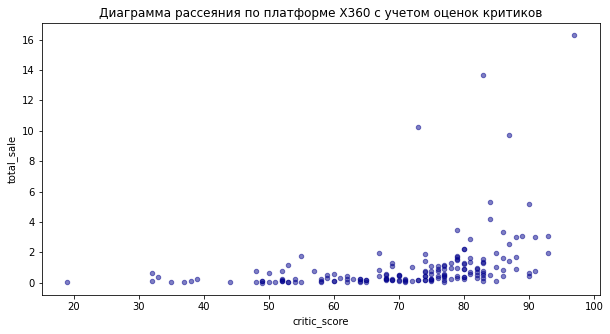

In [57]:
# построим диаграмму рассеяния для оценки критиков
data.query('platform == "X360"').plot(
    x='critic_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkblue',
    title='Диаграмма рассеяния по платформе X360 с учетом оценок критиков'
)
plt.show()

In [58]:
# посчитаем корреляцию
data.query('platform == "X360"')['total_sale'].corr(data['critic_score'])

0.36057348885073365

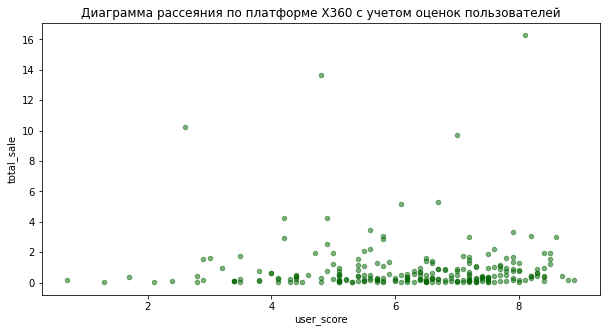

In [59]:
# построим диаграмму рассеяния для оценки пользователей
data.query('platform == "X360"').plot(
    x='user_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkgreen',
    title='Диаграмма рассеяния по платформе X360 с учетом оценок пользователей'
)
plt.show()

In [60]:
# посчитаем корреляцию
data.query('platform == "X360"')['total_sale'].corr(data['user_score'])

0.0061639786462133256

По корреляции Пирсона зависимость продаж игр на платформе PS4 от оценки критиков очень слабая.
От оценки пользователей равна 0.

**PS3**

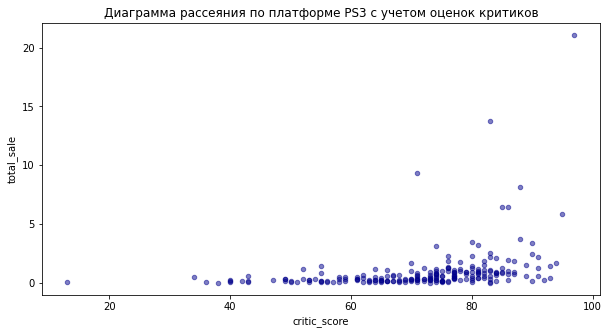

In [61]:
# построим диаграмму рассеяния для оценки критиков
data.query('platform == "PS3"').plot(
    x='critic_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkblue',
    title='Диаграмма рассеяния по платформе PS3 с учетом оценок критиков'
)
plt.show()

In [62]:
# посчитаем корреляцию
data.query('platform == "PS3"')['total_sale'].corr(data['critic_score'])

0.3314972592629587

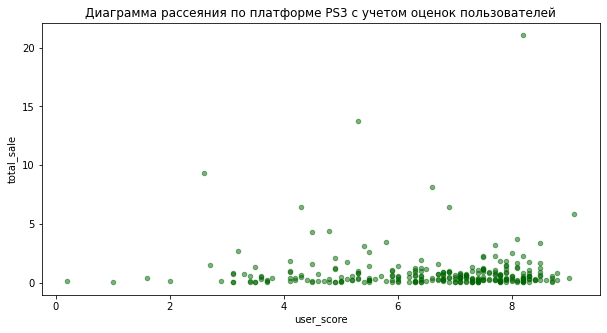

In [63]:
# построим диаграмму рассеяния для оценки пользователей
data.query('platform == "PS3"').plot(
    x='user_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkgreen',
    title='Диаграмма рассеяния по платформе PS3 с учетом оценок пользователей'
)
plt.show()

In [64]:
# посчитаем корреляцию
data.query('platform == "PS3"')['total_sale'].corr(data['user_score'])

-0.005143522887113828

По корреляции Пирсона зависимость продаж игр на платформе X360 от оценки критиков слабая.
От оценки пользователей можно сказать, что зависимости нет.

**XOne**

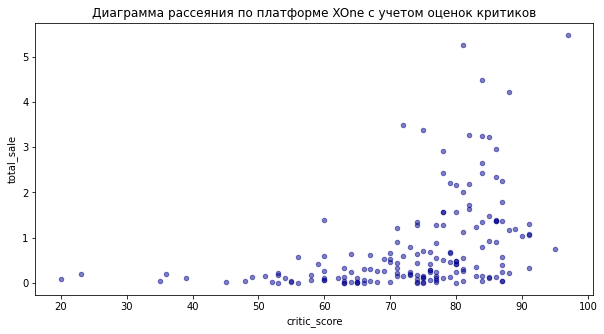

In [65]:
# построим диаграмму рассеяния для оценки критиков
data.query('platform == "XOne"').plot(
    x='critic_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkblue',
    title='Диаграмма рассеяния по платформе XOne с учетом оценок критиков'
)
plt.show()

In [66]:
# посчитаем корреляцию
data.query('platform == "XOne"')['total_sale'].corr(data['critic_score'])

0.41699832800840175

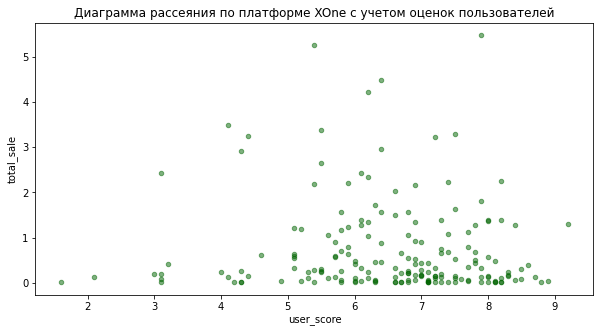

In [67]:
# построим диаграмму рассеяния для оценки пользователей
data.query('platform == "XOne"').plot(
    x='user_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkgreen',
    title='Диаграмма рассеяния по платформе XOne с учетом оценок пользователей'
)
plt.show()

In [68]:
# посчитаем корреляцию
data.query('platform == "XOne"')['total_sale'].corr(data['user_score'])

-0.06892505328279412

По корреляции Пирсона зависимость продаж игр на платформе XOne от оценки критиков умеренная.
От оценки пользователей зависимости нет.

**3DS**

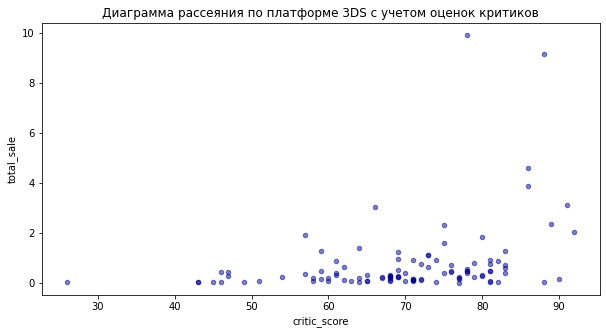

In [69]:
# построим диаграмму рассеяния для оценки критиков
data.query('platform == "3DS"').plot(
    x='critic_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkblue',
    title='Диаграмма рассеяния по платформе 3DS с учетом оценок критиков'
)
plt.show()

In [70]:
# посчитаем корреляцию
data.query('platform == "3DS"')['total_sale'].corr(data['critic_score'])

0.32080286953607845

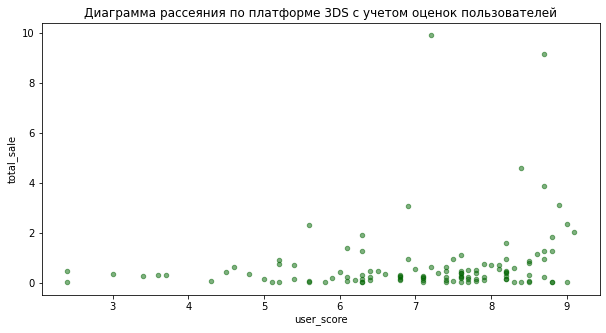

In [71]:
# построим диаграмму рассеяния для оценки пользователей
data.query('platform == "3DS"').plot(
    x='user_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkgreen',
    title='Диаграмма рассеяния по платформе 3DS с учетом оценок пользователей'
)
plt.show()

In [72]:
# посчитаем корреляцию
data.query('platform == "3DS"')['total_sale'].corr(data['user_score'])

0.19758263411038596

По корреляции Пирсона зависимость продаж игр на платформе 3DS от оценки критиков слабая.
От оценки пользователей зависимость минимальная.

**WiiU**

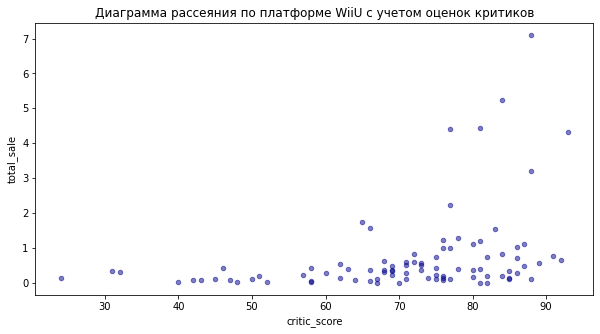

In [73]:
# построим диаграмму рассеяния для оценки критиков
data.query('platform == "WiiU"').plot(
    x='critic_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkblue',
    title='Диаграмма рассеяния по платформе WiiU с учетом оценок критиков'
)
plt.show()

In [74]:
# посчитаем корреляцию
data.query('platform == "WiiU"')['total_sale'].corr(data['critic_score'])

0.3483797601201749

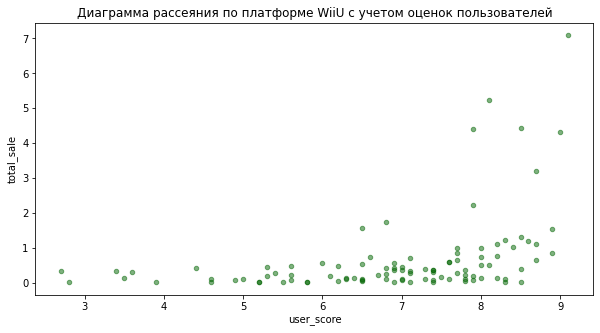

In [75]:
# построим диаграмму рассеяния для оценки пользователей
data.query('platform == "WiiU"').plot(
    x='user_score', 
    y='total_sale', 
    kind='scatter', 
    alpha=0.5, 
    figsize=(10, 5),
    color='darkgreen',
    title='Диаграмма рассеяния по платформе WiiU с учетом оценок пользователей'
)
plt.show()

In [76]:
# посчитаем корреляцию
data.query('platform == "WiiU"')['total_sale'].corr(data['user_score'])

0.4002190202148617

По корреляции Пирсона зависимость продаж игр на платформе WiiU от оценки критиков слабая.
От оценки пользователей зависимость тоже слабая.

**Вывод:**
<div style="border:solid green 1px; padding: 20px">

Явной зависимости от оценки критиков для платформ PS4 и XOne не видно, однако она всё-таки есть.   
Что касается зависимости продаж от оценок пользователей, то явной зависимости для платформ PS4 и XOne не обнаружено.
       
Возможно, PS4 является самым разрекламированным брендом и на неё выходят самые лучшие и востребованные у потребителей игры, а остальным платформам приходится довольствоваться тем, что есть.
Поэтому и возникла такая разница в объёмах продаж.
Остальные платформы также не имеют особой зависимости от оценок пользователей и критиков.
    
</div>

2.5. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?   
Выделяются ли жанры с высокими и низкими продажами?  

Для максимальной прибыльности необходимо найти стабильные жанры, на которые есть устойчивый спрос.

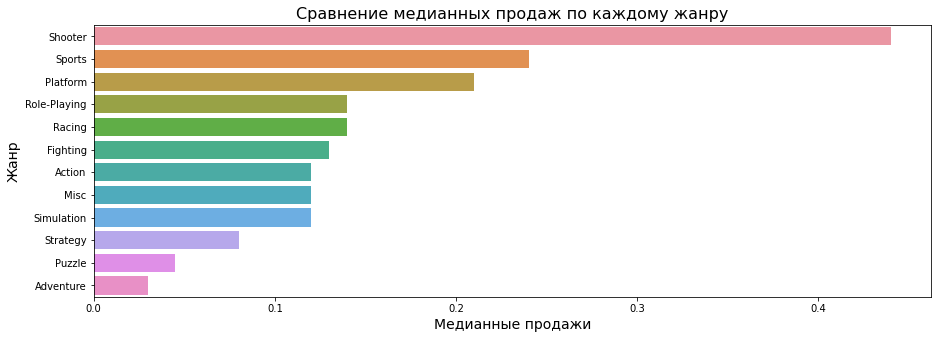

In [78]:
# сгруппируем медианные продажи по жанрам
genre_sales = (
    data.groupby('genre', as_index = False)['total_sale'].agg('median')\
    .sort_values('total_sale', ascending = False)
)    

# построение столбчатой диаграммы
plt.figure(figsize = (15, 5))
sns.barplot(
    data = genre_sales,
    x = 'total_sale',
    y = 'genre')
plt.xlabel('Медианные продажи', fontsize = 14)
plt.ylabel('Жанр', fontsize = 14)
plt.title('Сравнение медианных продаж по каждому жанру', fontsize = 16);

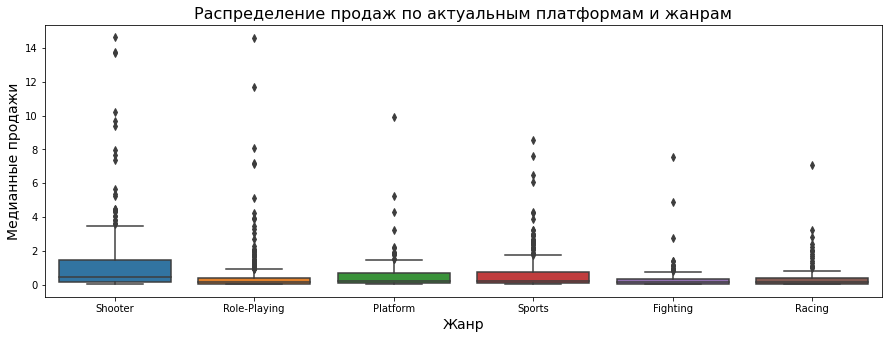

In [79]:
genres = ['Shooter', 'Sports', 'Platform', 'Role-Playing', 'Racing', 'Fighting']
actual_genre = data.query('@genres in genre')

# построение диаграммы размаха по актуальным платформам и жанрам
plt.figure(figsize = (15, 5))
sns.boxplot(
    data = actual_genre,
    x = 'genre',
    y = 'total_sale')

plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Медианные продажи', fontsize = 14)
plt.title('Распределение продаж по актуальным платформам и жанрам', fontsize = 16);

**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Наиболее продаваемым жанром является Shooter. На втором месте Sports и Platform. Также неплохо показали себя жанры Role-Plaiyng и Racing медианные продажи которых стабильно высокие.
Наименьшие показатели у Adventure, Puzzle и Strategy.
    
</div>

# **Составим портрет пользователя каждого региона**

<div style="border:solid blue 1px; padding: 20px"> 
    
 # Цели
  Определим для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясним разницу.
  - Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
</div>

1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.

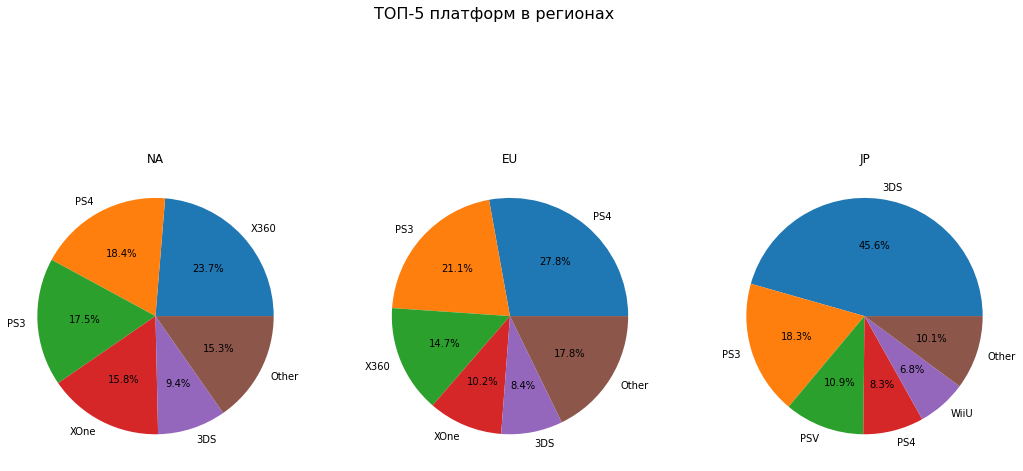

In [80]:
#задаем список регионов
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

#создадим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize = (18, 9))
fig.suptitle('ТОП-5 платформ в регионах', fontsize = 16)
for i in range(3):
    #выберем топ-5 продающих платформ
    data_platform = (data.groupby('platform', as_index = False)[region_sales[i]].sum()
            .sort_values(region_sales[i], ascending = False, ignore_index = True)
            .head()
           )
    #занесём все остальные продажи в Other
    data_platform = data_platform.append(
        {'platform':'Other', 
         region_sales[i]:data[region_sales[i]].sum() - data_platform[region_sales[i]].sum()}, ignore_index = True)
    axs[i].pie(data_platform[region_sales[i]], labels = data_platform['platform'], autopct = '%1.1f%%')
    
    #добавим название региона
    axs[i].set_title(data_platform.columns[1].split('_')[0].upper())
plt.show()    

**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
В Северной Америке в лидерах платформа X360 на ней играет более 23% пользователей.
Также пользователи играют через PS3, PS4 и 3DS и XOne общая доля которых составила более 61%. Доля топ-5 платформ от общего числа составила 84,8%.   
Поведение жителей Европы немного отлично от жителей Сев.Америки, так как самой популярной платформой там считается PS4, которая занимает 27,8% всего рынка. Следом за ней по популярности идет PS3 с долей 21,1%. X360 имеет долю 14,7%. Всего на топ-5 приходится 82,2% от всех используемых платформ.   
В Японии ситуация сильно отличается от двух других частей света. Основную долю рынка в ней составляет платформа 3DS, на которую приходится 45,6% всех продаж. При этом на долю топ-5 платформ приходится более 89,9% от всех продаж.
    
</div>

2. Самые популярные жанры (топ-5). Поясним разницу.

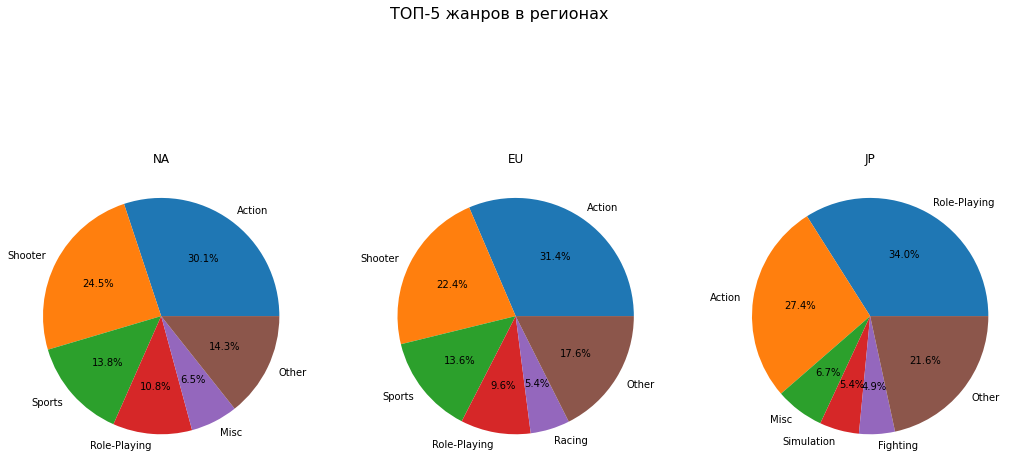

In [81]:
#создадим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize = (18,9))
fig.suptitle('ТОП-5 жанров в регионах', fontsize = 16)
for i in range(3):
    #выберем топ-5 самых продающихся жанров
    data_genre = (data.groupby('genre', as_index = False)[region_sales[i]].sum()
            .sort_values(region_sales[i], ascending = False, ignore_index = True)
            .head()
            )
    #занесём все остальные продажи в Other
    data_genre = data_genre.append(
        {'genre':'Other', region_sales[i]:data[region_sales[i]].sum() - data_genre[region_sales[i]].sum()}, ignore_index = True)
    axs[i].pie(data_genre[region_sales[i]], labels = data_genre['genre'], autopct = '%1.1f%%')
    
    #зададим название региона
    axs[i].set_title(data_genre.columns[1].split('_')[0].upper())
plt.show()    

**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Жители Северной Америки больше предпочитают играть в Экшен, Шутеры, а также спортивные и ролевые игры. Доля топ-5 жанров от общего числа составила 85,7%.   
Ситуация у жителей Европы схожа с жителями Сев.Америки, однако больше всего люди предпочитают Экшен игры, доля которых составила 31,4%. Всего на долю топ-5 пришлось 82,4% продаж. 
Любители игр из Японии больше предпочитают ролевые и Экшен игры, обоюдная доля которых составила 61,4%. Доля топ-5 от общего количества проданных игр составила 78,4%. Также жители Японии непрочь поиграть в Симуляторы.
    
</div>

3. Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [82]:
# добавим к аббревиатуре рейтинга возрастное ограничение
data.loc[data.rating == 'M', 'rating'] = 'Для взрослых'
data.loc[data.rating == 'E', 'rating'] = 'Для всех возрастов'
data.loc[data.rating == 'T', 'rating'] = 'Для подростков'
data.loc[data.rating == 'E10+', 'rating'] = 'Для всех старше 10 лет'

# построим сводную таблицу для выявления зависимости продаж от рейтинга ESRB
rating_pt = (
    data.pivot_table(
        index = 'rating', 
        values = ['na_sales', 'eu_sales', 'jp_sales'], 
        aggfunc = 'sum', 
        margins = True, 
        margins_name = 'total_sale')
)   
rating_pt['total_sale'] = rating_pt['na_sales'] + rating_pt['eu_sales'] + rating_pt['jp_sales']
rating_pt = (rating_pt
                .sort_values('total_sale', ascending = True)
                .reindex(columns=['na_sales', 'eu_sales', 'jp_sales', 'total_sale'])
)                
rating_pt

,na_sales,eu_sales,jp_sales,total_sale
rating,,,,
Для всех старше 10 лет,75.70,55.37,8.19,139.26
Для подростков,66.02,52.96,26.02,145.00
Для всех возрастов,114.37,113.03,28.33,255.73
Empty,103.31,91.50,108.84,303.65
Для взрослых,231.57,193.96,21.20,446.73
total_sale,590.97,506.82,192.58,1290.37


**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Пользователи Северной Америки в основном предпочитают игры для взрослых и игры для всех возрастов. Так же присутствуют игры без рейтинга, продажи которых составили 103 млн копий от общего числа проданных игр в размере 590 млн копий.   
Похожая ситуация наблюдается у любителей игр в Европе, общие продажи которых оказались чуть ниже - 506 млн копий.   
В Японии структура иная: основная доля продаж - 108,84 - приходится на игры без маркировки и 28,33 на игры для всех возрастов. Общие продажи в Японии составили 192 млн копий, что в среднем почти в 3 раза меньше чем у Европы и у Северной Америки. 
Отсутствие рейтинга, вероятно, связано с тем, что рейтинг ESRB предназначен для маркировки игр, выпущенных из США и Канады, поэтому логично, что для Европы и Японии его нет.

</div>

# **Проверим гипотезы**

<div style="border:solid blue 1px; padding: 20px"> 
    
 # Цели
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
</div>

1 гипотеза:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Будем использовать выборку без пропущенных значений. Для этого используем метод dropna().

In [84]:
results_platform = st.ttest_ind(data.query('platform == "XOne"')['user_score'].dropna(),
                      data.query('platform == "PC"')['user_score'].dropna())
print('p-значение: ', results_platform.pvalue)

alpha = .05

if results_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

p-значение:  0.5535080500643661
Принимаем нулевую гипотезу


In [85]:
data.query('platform == "XOne"')['user_score'].mean()

6.521428571428572

In [86]:
data.query('platform == "PC"')['user_score'].mean()

6.428640776699029

**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Гипотеза подтвердилась.

</div>

2 гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [88]:
results_platform = st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(),
                      data.query('genre == "Sports"')['user_score'].dropna())

print('p-значение: ', results_platform.pvalue)

alpha = .05

if results_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


In [89]:
data.query('genre == "Action"')['user_score'].mean()

6.825047801147227

In [90]:
data.query('genre == "Sports"')['user_score'].mean()

5.455897435897437

**Вывод:**
<div style="border:solid green 1px; padding: 20px">
    
Получив p-value, мы отвергли Нулевую гипотезу.   
Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.
    
</div>    

### Общий вывод

<div style="border:solid red 1px; padding: 20px">
    
В ходе предобработки данных:  
 - Были изменены типы данных;    
 - Проверили количество пропусков в процентах;
 - Обработали пропуски;    
 - Описали причины, которые могли привести к пропускам;
 - Обратили внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей и заменили это значение;  
 - Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец. 

Провели исследовательский анализ данных, где выяснили:
  Самый активный период с 2005 по 2009 год. В этот промежуток времени выпускалось нибольшее количество игр.  
  Популярными игровыми платформами за весь период стали PS2, X360, PS3, Wii, DS, PS.  

Создали распределение топ-6 платформ по годам  и выяснили, что в среднем существование платформы 10 лет.
Большинство платформ начали появляться с начала 2000-х годов. Это в частности PS2.
С 2004 по 2010 год - DS, остальные начали свое развитие с 2006 года.
Самые продаваемые бренды - это Sony Play Station и Xbox. 
Активные продажи игр были в период с 2001 по 2012 год, затем пошел спад. 
Что, скорее всего, связано с развитием смартфонов и набирающими популярность игровыми приложениями.

Взяли актуальные для анализа данные с 2012 по 2016 год.
Из выборки с 2012 по 2016 год сделали вывод, что платформа PS4 — лидирует по продажам.
Наибольший потенциал имеют платформы PS4, X360, 3DS, PS3 и XOne, так как их распределения имеют наибольшее распределение в положительную сторону.
           
Взяли для исследования топ-5 платформ и изучили влияние на продажи оценки пользователей и критиков.
Явной зависимости от оценки критиков для платформ PS4 и XOne не видно, однако она всё-таки есть.   
Что касается зависимости продаж от оценок пользователей, то явной зависимости для платформ PS4 и XOne не обнаружено.
Платформа X360 имеет более уверенную зависимость от оценки критиков.     
На платформах 3DS и WiiU наблюдается обоюдная корреляция оценок пользователей и критиков к продажам, однако выражена она неявно. По большому счету, сравнивая топовую платформу PS4 с аналогами, ничего необычного замечено не было.
Возможно, PS4 является самым разрекламированным брендом и на неё выходят самые лучшие и востребованные у потребителей игры, а остальным платформам приходится довольствоваться тем, что есть.
Поэтому и возникла такая разница в объёмах продаж.

Наиболее продаваемым жанром является Shooter. На втором месте Sports и Platform. Также неплохо показали себя жанры Role-Plaiyng и Racing медианные продажи которых стабильно высокие.
Наименьшие показатели у Adventure, Puzzle и Strategy.

Составили портрет пользователя каждого региона:

1. В Северной Америке в лидерах платформа X360 на ней играет более 23% пользователей.
Также пользователи играют через PS3, PS4 и 3DS и XOne общая доля которых составила более 61%. Доля топ-5 платформ от общего числа составила 84,8%. 
Жители Северной Америки больше предпочитают играть в Экшен, Шутеры, а также спортивные и ролевые игры. Доля топ-5 жанров от общего числа составила 85,7%.       
Пользователи Северной Америки в основном предпочитают игры для взрослых и игры для всех возрастов. Так же присутствуют игры без рейтинга, продажи которых составили 103 млн копий от общего числа проданных игр в размере 590 млн копий.
    
    
2. Поведение жителей Европы немного отлично от жителей Сев.Америки, так как самой популярной платформой там считается PS4, которая занимает 27,8% всего рынка. Следом за ней по популярности идет PS3 с долей 21,1%. X360 имеет долю 14,7%. Всего на топ-5 приходится 82,2% от всех используемых платформ.
 Ситуация у жителей Европы схожа с жителями Сев.Америки, однако больше всего люди предпочитают Экшен игры, доля которых составила 31,4%. Всего на долю топ-5 пришлось 82,4% продаж.     
Похожая ситуация наблюдается у любителей игр в Европе, общие продажи которых оказались чуть ниже - 506 млн копий.  
      
    
3. В Японии ситуация сильно отличается от двух других частей света. Основную долю рынка в ней составляет платформа 3DS, на которую приходится 45,6% всех продаж. При этом на долю топ-5 платформ приходится более 89,9% от всех продаж.
Любители игр из Японии больше предпочитают ролевые и Экшен игры, обоюдная доля которых составила 61,4%. Доля топ-5 от общего количества проданных игр составила 78,4%. Также жители Японии непрочь поиграть в Симуляторы.
В Японии структура иная: основная доля продаж - 108,84 - приходится на игры без маркировки и 28,33 на игры для всех возрастов. Общие продажи в Японии составили 192 млн копий, что в среднем почти в 3 раза меньше чем у Европы и у Северной Америки. 
Отсутствие рейтинга, вероятно, связано с тем, что рейтинг ESRB предназначен для маркировки игр, выпущенных из США и Канады, поэтому логично, что для Европы и Японии его нет.  
      
Проверили гипотезы:  

1 гипотеза:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза подтвердилась. Средние рейтинги у этих платформ одинаковые.

2 гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза подтвердилась.   
    
---------------------------------------------------------------------------------------------------------------------------    
    
За последние 5 лет можно увидеть, как набирают популярность платформы PS4 и X360. Их выручка и количество выпущенных игр растут, а значит, есть смысл активно продвигать эти платформы. 
Менее популярны платформы 3DS, XOne, WiiU, имеющие значительную долю на рынке игр, однако их продажи в последние годы падают.

В Северной Америке можно сделать рекламный уклон на жанр Misc на приставку 3DS. 

В Европе Racing на платформе 3DS.

В Японии Симуляторы на платформе WiiU или игры жанра Файтинг на платформе PS4.  

</div>